In [27]:
import pandas as pd
import numpy as np

# outlook_options = ['Rainy', 'Overcast', 'Sunny']
# temp_options = ['Hot', 'Mild', 'Cool']
# humidity_options = ['High', 'Normal']
# windy_options = ['t', 'f']
# play_options = ['yes', 'no']

# np.random.seed(42)

# new_data = {
#     'Outlook': np.random.choice(outlook_options, 100),
#     'Temp': np.random.choice(temp_options, 100),
#     'Humidity': np.random.choice(humidity_options, 100),
#     'Windy': np.random.choice(windy_options, 100),
#     'Play': np.random.choice(play_options, 100)
# }

# df = pd.DataFrame(new_data)


# print(df)


data = {
    'Outlook': ['Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy',
                'Sunny', 'Rainy', 'Overcast', 'Overcast', 'Sunny'],
    'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool',
             'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High',
                 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['f', 't', 'f', 'f', 'f', 't', 't', 'f', 'f', 'f', 't', 't', 'f', 't'],
    'Play': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

print(df)


     Outlook  Temp Humidity Windy Play
0      Rainy   Hot     High     f   no
1      Rainy   Hot     High     t   no
2   Overcast   Hot     High     f  yes
3      Sunny  Mild     High     f  yes
4      Sunny  Cool   Normal     f  yes
5      Sunny  Cool   Normal     t   no
6   Overcast  Cool   Normal     t  yes
7      Rainy  Mild     High     f   no
8      Rainy  Cool   Normal     f  yes
9      Sunny  Mild   Normal     f  yes
10     Rainy  Mild   Normal     t  yes
11  Overcast  Mild     High     t  yes
12  Overcast   Hot   Normal     f  yes
13     Sunny  Mild     High     t   no


In [28]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [29]:
outlook_at=LabelEncoder()   #string to numeric data convert garna
Temp_at=LabelEncoder()
Hum_at=LabelEncoder()
win_at=LabelEncoder()

In [30]:
#Dropping the target variable and make it is as newframe as it wont be interpreted
inputs=df.drop('Play',axis='columns')
target=df['Play']
target

,Play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [31]:
#new dataframe for input variable with will store numerical data replacing string
inputs['outlook_n']= outlook_at.fit_transform(inputs['Outlook'])
inputs['Temp_n']= outlook_at.fit_transform(inputs['Temp'])
inputs['Hum_n']= outlook_at.fit_transform(inputs['Humidity'])
inputs['win_n']= outlook_at.fit_transform(inputs['Windy'])
inputs

,Outlook,Temp,Humidity,Windy,outlook_n,Temp_n,Hum_n,win_n
0,Rainy,Hot,High,f,1,1,0,0
1,Rainy,Hot,High,t,1,1,0,1
2,Overcast,Hot,High,f,0,1,0,0
3,Sunny,Mild,High,f,2,2,0,0
4,Sunny,Cool,Normal,f,2,0,1,0
5,Sunny,Cool,Normal,t,2,0,1,1
6,Overcast,Cool,Normal,t,0,0,1,1
7,Rainy,Mild,High,f,1,2,0,0
8,Rainy,Cool,Normal,f,1,0,1,0
9,Sunny,Mild,Normal,f,2,2,1,0


In [32]:
#Dropping the string values outlook ,humidity and windy
inputs_n=inputs.drop(['Outlook','Temp','Humidity','Windy'],axis='columns')
inputs_n

,outlook_n,Temp_n,Hum_n,win_n
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [33]:
classifier = GaussianNB()    #Gaussian naivebayes
classifier.fit(inputs_n,target)

GaussianNB()

In [43]:
accuracy = classifier.score(inputs_n,target)
print(accuracy)

0.7142857142857143


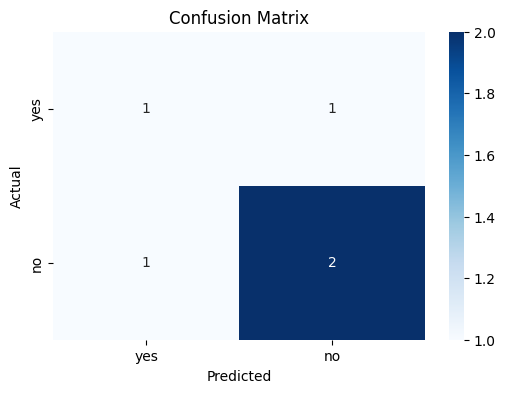

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=play_options, yticklabels=play_options)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [47]:
new_data_point = [[1, 1, 0, 0]]  # Rainy, Hot, High Humidity, No Wind
predicted_play = classifier.predict(new_data_point)
print(f"Predicted outcome for new data point (Rainy, Hot, High, No Windy): {predicted_play}")


Predicted outcome for new data point (Rainy, Hot, High, No Windy): ['no']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
